In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data uploading

In [16]:
filename = "../../Data/PIs/ESSA/PIs_horizontal_by_day.csv"
PIs_horizontal_df = pd.read_csv(filename, sep=' ')
PIs_horizontal_df = PIs_horizontal_df[['date', 'additionalDistanceMean',
        'additionalDistanceMedian', 'distanceChangePercentMean'
        ]]

PIs_horizontal_2019_df = PIs_horizontal_df[(PIs_horizontal_df['date']>=190301) & ((PIs_horizontal_df['date']<=190531))]
PIs_horizontal_2019_df.reset_index(drop=True, inplace = True)

PIs_horizontal_2020_df = PIs_horizontal_df[(PIs_horizontal_df['date']>=200301) & ((PIs_horizontal_df['date']<=200531))]
PIs_horizontal_2020_df.reset_index(drop=True, inplace = True)

filename = "../../data/PIs/ESSA/PIs_vertical_by_day.csv"
PIs_vertical_df = pd.read_csv(filename, sep=' ')
PIs_vertical_df = PIs_vertical_df[['date', 'numberOfFlights', 'timeOnLevelsMean', 'timeOnLevelsPercentMean'
        ]]

PIs_vertical_2019_df = PIs_vertical_df[(PIs_vertical_df['date']>=190301) & ((PIs_vertical_df['date']<=190531))]
PIs_vertical_2019_df.reset_index(drop=True, inplace = True)

PIs_vertical_2020_df = PIs_vertical_df[(PIs_vertical_df['date']>=200301) & ((PIs_vertical_df['date']<=200531))]
PIs_vertical_2020_df.reset_index(drop=True, inplace = True)

# PIs by days

In [3]:
def one_scale(ax1, index, data1, y_label1, data_min, data_max):

    lns = ax1.plot(index, data1, color='r')
        
    ax2.legend(lns, [y_label1], loc='best')

    ax1.set_xlabel('Days', fontsize=15)
    ax1.tick_params(axis='x', which='both', labelrotation = 90)
    
    ax1.set_ylim(data_min, data_max)
    ax1.set_ylabel(y_label1)
    
    for t in ax1.get_yticklabels():
        t.set_color('r')
        
    return ax1

def two_scales(ax1, index, date, data1, data2, y_label1, y_label2, data_min, data_max):
    ax2 = ax1.twinx()
    
    lns1 = ax1.plot(index, data1, color='b', linestyle = '--')
    lns2 = ax2.plot(index, data2, color='r')
        
    lns = lns1 +  lns2
    ax2.legend(lns, [y_label1,y_label2], loc='best')

    ax1.set_xlabel('Days', fontsize=24)
    ax1.tick_params(axis='x', which='both', labelrotation = 90, labelsize = 22)
        
    ax1.set_ylim(data_min, data_max)
    ax1.set_ylabel(y_label1)
    
    ax2.set_ylim(data_min, data_max)
    ax2.set_ylabel(y_label2)        

    for t in ax1.get_yticklabels():
        t.set_color('b')
        
    for t in ax2.get_yticklabels():
        t.set_color('r')
    
    date_list = date.tolist()
    x_labels = []
    for d in date_list:
        x_labels.append(str(d)[2:])
      
    X_Tick_List = []
    every_five = []
    for i in range(0, len(date), 5):
        X_Tick_List.append(i)
        every_five.append(x_labels[i])
    
    plt.xticks(ticks=X_Tick_List,labels=every_five, rotation=25,fontsize=8)
              
    return ax1, ax2

# Number of Flights

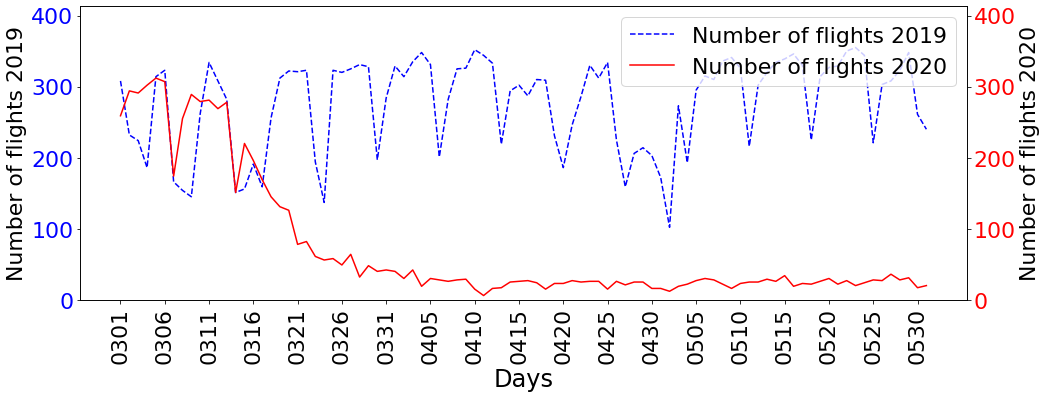

In [4]:
plt.rcParams["figure.figsize"] = (15,6)
plt.rcParams.update({'font.size': 22})

data_min = min(PIs_vertical_df['numberOfFlights'].min(), PIs_vertical_df['numberOfFlights'].min())
data_max = max(PIs_vertical_df['numberOfFlights'].max(), PIs_vertical_df['numberOfFlights'].max())

data_max = data_max + 50

ax = plt.subplot(1, 1, 1)
ax1, ax2 = two_scales(ax, PIs_vertical_2019_df.index, PIs_vertical_2019_df['date'], PIs_vertical_2019_df['numberOfFlights'], PIs_vertical_2020_df['numberOfFlights'], 'Number of flights 2019', 'Number of flights 2020', data_min, data_max)

plt.tight_layout()

In [18]:
PIs_vertical_2019_all_df = PIs_vertical_df[(PIs_vertical_df['date']>=190101) & ((PIs_vertical_df['date']<=191231))]
PIs_vertical_2019_all_df.reset_index(drop=True, inplace = True)

PIs_vertical_2020_01_03_df = PIs_vertical_df[(PIs_vertical_df['date']>=200101) & ((PIs_vertical_df['date']<=200331))]
PIs_vertical_2020_01_03_df.reset_index(drop=True, inplace = True)

PIs_vertical_2020_04_06_df = PIs_vertical_df[(PIs_vertical_df['date']>=200401) & ((PIs_vertical_df['date']<=200630))]
PIs_vertical_2020_04_06_df.reset_index(drop=True, inplace = True)

PIs_vertical_2020_07_09_df = PIs_vertical_df[(PIs_vertical_df['date']>=200701) & ((PIs_vertical_df['date']<=200930))]
PIs_vertical_2020_07_09_df.reset_index(drop=True, inplace = True)

PIs_vertical_2020_10_12_df = PIs_vertical_df[(PIs_vertical_df['date']>=201001) & ((PIs_vertical_df['date']<=201231))]
PIs_vertical_2020_10_12_df.reset_index(drop=True, inplace = True)

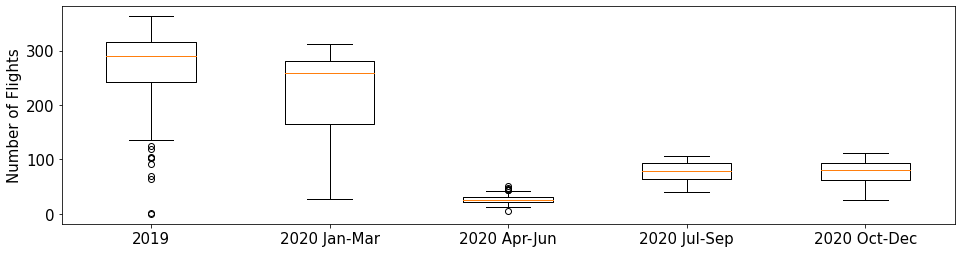

In [19]:
fig, ax = plt.subplots(1, 1,figsize=(16,4))

boxplots_list = []

boxplots_list.append(PIs_vertical_2019_all_df['numberOfFlights'])
boxplots_list.append(PIs_vertical_2020_01_03_df['numberOfFlights'])
boxplots_list.append(PIs_vertical_2020_04_06_df['numberOfFlights'])
boxplots_list.append(PIs_vertical_2020_07_09_df['numberOfFlights'])
boxplots_list.append(PIs_vertical_2020_10_12_df['numberOfFlights'])

ticklabels = ["2019", "2020 Jan-Mar", "2020 Apr-Jun", "2020 Jul-Sep", "2020 Oct-Dec"]

positions = [1, 2, 3, 4, 5]

box_plot = ax.boxplot(boxplots_list, positions=positions)
ax.set_xticklabels(ticklabels, fontsize=15, rotation = 0)
plt.yticks(fontsize=15)

ax.set_ylabel("Number of Flights", fontsize=15)

plt.show()

# Average Time on Levels (%)

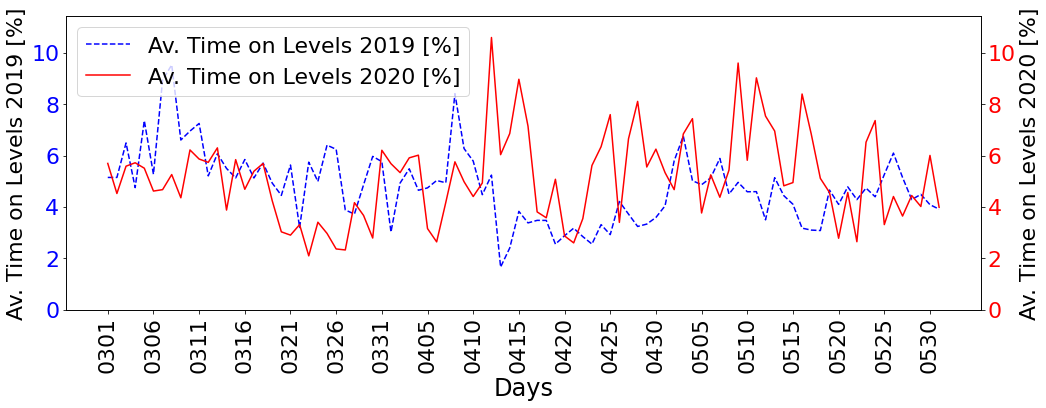

In [7]:
plt.rcParams["figure.figsize"] = (15,6)

data_min = min(PIs_vertical_df['timeOnLevelsPercentMean'].min(), PIs_vertical_df['timeOnLevelsPercentMean'].min())
data_max = max(PIs_vertical_df['timeOnLevelsPercentMean'].max(), PIs_vertical_df['timeOnLevelsPercentMean'].max())
data_max = data_max + 0.1

ax = plt.subplot(1, 1, 1)
ax1, ax2 = two_scales(ax, PIs_vertical_2019_df.index, PIs_vertical_2019_df['date'], PIs_vertical_2019_df['timeOnLevelsPercentMean'], PIs_vertical_2020_df['timeOnLevelsPercentMean'], 'Av. Time on Levels 2019 [%]', 'Av. Time on Levels 2020 [%]', data_min, data_max)

plt.tight_layout()

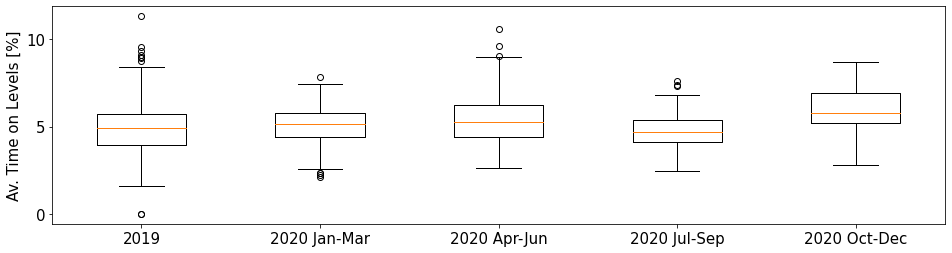

In [20]:
fig, ax = plt.subplots(1, 1,figsize=(16,4))

boxplots_list = []

boxplots_list.append(PIs_vertical_2019_all_df['timeOnLevelsPercentMean'])
boxplots_list.append(PIs_vertical_2020_01_03_df['timeOnLevelsPercentMean'])
boxplots_list.append(PIs_vertical_2020_04_06_df['timeOnLevelsPercentMean'])
boxplots_list.append(PIs_vertical_2020_07_09_df['timeOnLevelsPercentMean'])
boxplots_list.append(PIs_vertical_2020_10_12_df['timeOnLevelsPercentMean'])

ticklabels = ["2019", "2020 Jan-Mar", "2020 Apr-Jun", "2020 Jul-Sep", "2020 Oct-Dec"]

positions = [1, 2, 3, 4, 5]

box_plot = ax.boxplot(boxplots_list, positions=positions)
ax.set_xticklabels(ticklabels, fontsize=15, rotation = 0)
plt.yticks(fontsize=15)

ax.set_ylabel("Av. Time on Levels [%]", fontsize=15)

plt.show()

# Average Time on Levels (min)

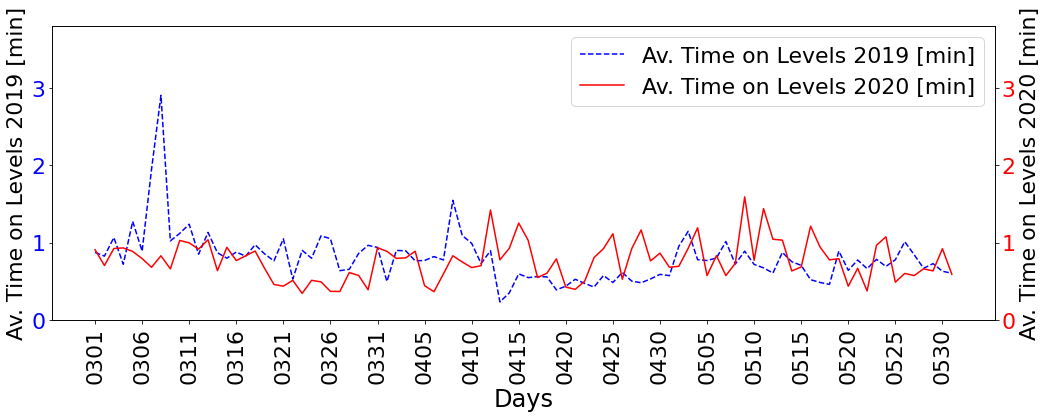

In [8]:
plt.rcParams["figure.figsize"] = (15,6)

data_min = min(PIs_vertical_df['timeOnLevelsMean'].min(), PIs_vertical_df['timeOnLevelsMean'].min())
data_max = max(PIs_vertical_df['timeOnLevelsMean'].max(), PIs_vertical_df['timeOnLevelsMean'].max())
data_max = data_max + 0.1

ax = plt.subplot(1, 1, 1)
ax1, ax2 = two_scales(ax, PIs_vertical_2019_df.index, PIs_vertical_2019_df['date'], PIs_vertical_2019_df['timeOnLevelsMean'], PIs_vertical_2020_df['timeOnLevelsMean'], 'Av. Time on Levels 2019 [min]', 'Av. Time on Levels 2020 [min]', data_min, data_max)

plt.tight_layout()

# Average Additional Distance (%)

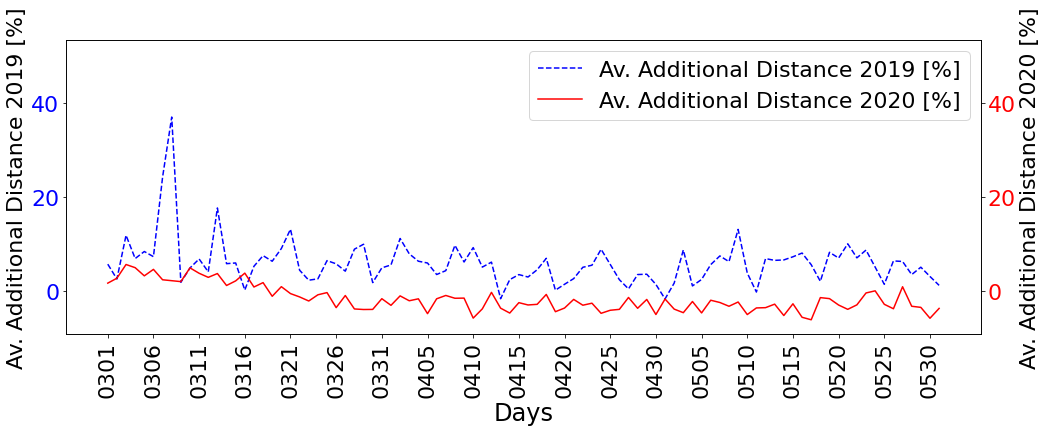

In [9]:
plt.rcParams["figure.figsize"] = (15,6)

data_min = min(PIs_horizontal_df['distanceChangePercentMean'].min(), PIs_horizontal_df['distanceChangePercentMean'].min())
data_max = max(PIs_horizontal_df['distanceChangePercentMean'].max(), PIs_horizontal_df['distanceChangePercentMean'].max())
data_max = data_max + 0.1

ax = plt.subplot(1, 1, 1)
ax1, ax2 = two_scales(ax, PIs_horizontal_2019_df.index, PIs_horizontal_2019_df['date'], PIs_horizontal_2019_df['distanceChangePercentMean'], PIs_horizontal_2020_df['additionalDistanceMean'], 'Av. Additional Distance 2019 [%]', 'Av. Additional Distance 2020 [%]', data_min, data_max)

plt.tight_layout()

In [21]:
PIs_horizontal_2019_all_df = PIs_horizontal_df[(PIs_horizontal_df['date']>=190101) & ((PIs_horizontal_df['date']<=191231))]
PIs_horizontal_2019_all_df.reset_index(drop=True, inplace = True)

PIs_horizontal_2020_01_03_df = PIs_horizontal_df[(PIs_horizontal_df['date']>=200101) & ((PIs_horizontal_df['date']<=200331))]
PIs_horizontal_2020_01_03_df.reset_index(drop=True, inplace = True)

PIs_horizontal_2020_04_06_df = PIs_horizontal_df[(PIs_horizontal_df['date']>=200401) & ((PIs_horizontal_df['date']<=200630))]
PIs_horizontal_2020_04_06_df.reset_index(drop=True, inplace = True)

PIs_horizontal_2020_07_09_df = PIs_horizontal_df[(PIs_horizontal_df['date']>=200701) & ((PIs_horizontal_df['date']<=200930))]
PIs_horizontal_2020_07_09_df.reset_index(drop=True, inplace = True)

PIs_horizontal_2020_10_12_df = PIs_horizontal_df[(PIs_horizontal_df['date']>=201001) & ((PIs_horizontal_df['date']<=201231))]
PIs_horizontal_2020_10_12_df.reset_index(drop=True, inplace = True)

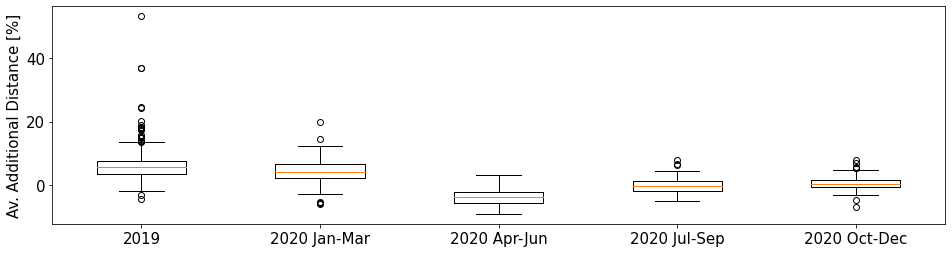

In [22]:
fig, ax = plt.subplots(1, 1,figsize=(16,4))

boxplots_list = []

boxplots_list.append(PIs_horizontal_2019_all_df['distanceChangePercentMean'])
boxplots_list.append(PIs_horizontal_2020_01_03_df['distanceChangePercentMean'])
boxplots_list.append(PIs_horizontal_2020_04_06_df['distanceChangePercentMean'])
boxplots_list.append(PIs_horizontal_2020_07_09_df['distanceChangePercentMean'])
boxplots_list.append(PIs_horizontal_2020_10_12_df['distanceChangePercentMean'])

ticklabels = ["2019", "2020 Jan-Mar", "2020 Apr-Jun", "2020 Jul-Sep", "2020 Oct-Dec"]

positions = [1, 2, 3, 4, 5]

box_plot = ax.boxplot(boxplots_list, positions=positions)
ax.set_xticklabels(ticklabels, fontsize=15, rotation = 0)
plt.yticks(fontsize=15)

ax.set_ylabel("Av. Additional Distance [%]", fontsize=15)

plt.show()

# Average Additional Distance (NM)

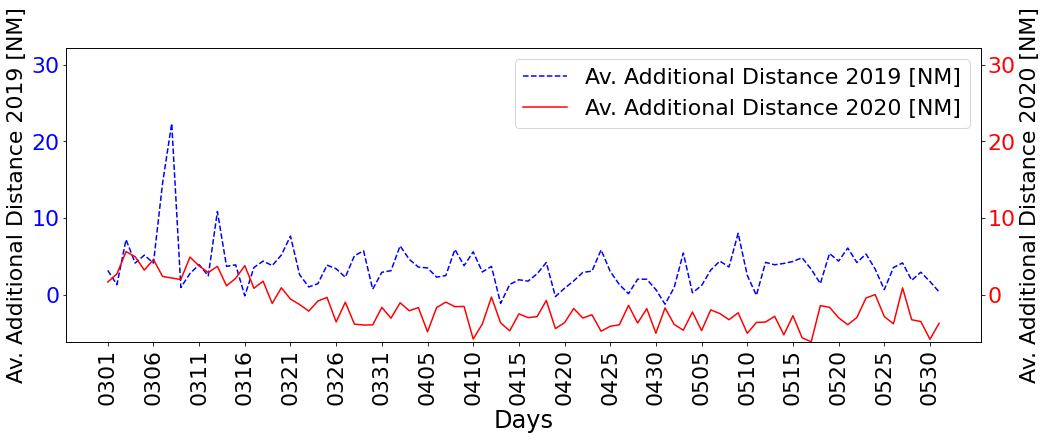

In [10]:
plt.rcParams["figure.figsize"] = (15,6)

data_min = min(PIs_horizontal_df['additionalDistanceMean'].min(), PIs_horizontal_df['additionalDistanceMean'].min())
data_max = max(PIs_horizontal_df['additionalDistanceMean'].max(), PIs_horizontal_df['additionalDistanceMean'].max())
data_max = data_max + 0.1

ax = plt.subplot(1, 1, 1)
ax1, ax2 = two_scales(ax, PIs_horizontal_2019_df.index, PIs_horizontal_2019_df['date'], PIs_horizontal_2019_df['additionalDistanceMean'], PIs_horizontal_2020_df['additionalDistanceMean'], 'Av. Additional Distance 2019 [NM]', 'Av. Additional Distance 2020 [NM]', data_min, data_max)

plt.tight_layout()